In [1]:
import sys
import os

# Add the 'src' directory to the Python path
src_dir = os.path.join(os.path.dirname(os.getcwd()), 'src')
sys.path.append(src_dir)

In [2]:
from NeuralNetwork import Neural_Network
from GD_class import GradientDescent
from cost_functions import Cost_Functions
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns

def grad_cost_logreg(target, pred):
    
    return (pred - target)/(pred * (1 - pred))

def plot_heatmap(values, x_ticks, y_ticks, x_label, y_label, title):
    fig, ax = plt.subplots(figsize = (6, 5))
    heatmap = sns.heatmap(values, annot=True, ax=ax, cmap="viridis")
    heatmap.set_xticklabels(x_ticks)
    heatmap.set_yticklabels(y_ticks)
    ax.set_title(title)
    ax.set_ylabel(x_label)
    ax.set_xlabel(y_label)
    plt.show()

# Loading and splitting the dataset

In [3]:
cancer = load_breast_cancer()
X_orig = jnp.array(cancer.data)
target = jnp.array(cancer.target)
target = target.reshape(len(target), 1)

# Splitting into training and test set
test_size = 0.2
X_train, X_test, target_train, target_test = train_test_split(X_orig, target, test_size=test_size)

# Scaling the data

In [4]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Setting up logistic regression
Using the neural network class we have developed, with no hidden layers and sigmoid as activation function for output layer.

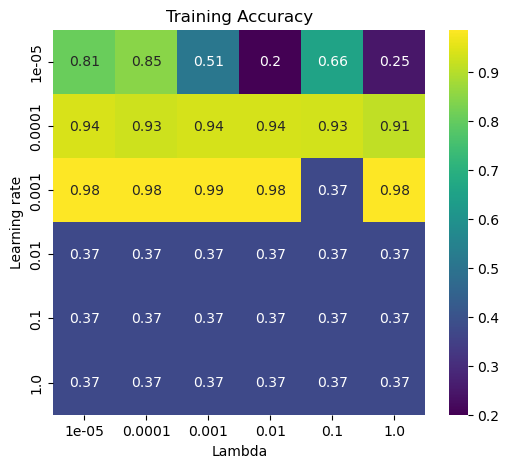

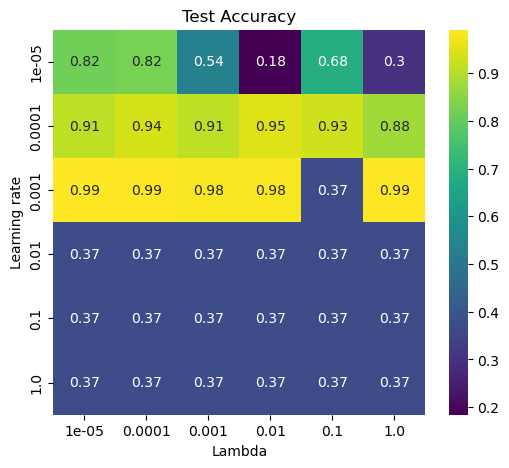

In [5]:

n_hidden_layers = 0
n_hidden_nodes = 0
n_outputs = 1
n_features = X_train.shape[1]

learning_rates = np.logspace(-5, 0, 6)
lmbd_vals = np.logspace(-5, 0, 6)

accuracy_train = np.zeros((len(learning_rates), len(lmbd_vals)))
accuracy_test = np.zeros((len(learning_rates), len(lmbd_vals)))

for i, lr in enumerate(learning_rates):
    for j, lmbd in enumerate(lmbd_vals):

        ffnn = Neural_Network(n_features, n_hidden_layers, n_hidden_nodes, n_outputs, 
                              grad_cost_function=grad_cost_logreg,
                              learning_rate=lr, 
                              lmbd=lmbd, 
                              activation_function_hidden='sigmoid',
                              activation_function_output='sigmoid',
                              optimizer=None,
                              classification_problem=True)
        
        ffnn.train(X_train_scaled, target_train, num_iter=1000)
        pred_train = ffnn.predict(X_train_scaled)
        pred_test = ffnn.predict(X_test_scaled)

        accuracy_train[i][j] = accuracy_score(target_train, pred_train)
        accuracy_test[i][j] = accuracy_score(target_test, pred_test)

plot_heatmap(accuracy_train, x_ticks=lmbd_vals, y_ticks=learning_rates,
             x_label="Learning rate", y_label="Lambda", title="Training Accuracy")

plot_heatmap(accuracy_test, x_ticks=lmbd_vals, y_ticks=learning_rates,
             x_label="Learning rate", y_label="Lambda", title="Test Accuracy")
